In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from tabulate import tabulate
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier


#!pip install statsmodels==0.13.5
#!pip install graphviz


In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df1 = pd.read_csv("o2saturation.csv")

In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Get total count of records in the dataset

len(df.index)

303

##### * There are 303 rows in this dataset.





### Description for each column name.

Age : Age of the patient

Sex : Sex of the patient

exng: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina


Value 2: atypical angina

Value 3: non-anginal pain

Value 4: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol : cholesterol in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal

Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack




In [6]:
# Print the data types of each column
print(df.dtypes)

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object


In [7]:
# Identify missing values in the data

df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

##### * There are no missing or null values in the data.

In [8]:
# Check for duplicates

df.duplicated().sum()



1

In [9]:
# Print duplicate rows

duplicate = df[df.duplicated()]
 
print(duplicate)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
164   38    1   2     138   175    0        1       173     0      0.0    2   

     caa  thall  output  
164    4      2       1  


##### * There is 1 duplicate in this dataset. Since there are no unique ids for each entry, we cannot be sure if this is a duplicate or not.

In [10]:
# Remove duplicates

df = df.drop_duplicates()

In [11]:
# Age outliers

df[['age']].describe()

,age
count,302.00000
mean,54.42053
std,9.04797
min,29.00000
25%,48.00000
50%,55.50000
75%,61.00000
max,77.00000


In [12]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
# Trtbps outliers

print(df[['trtbps']].describe())

IQR_trtbps = 140-120

high_trtbps = 140 + (1.5*IQR_trtbps)
low_trtbps = 120 - (1.5*IQR_trtbps)

print("The upper boundary for trtbps is:", high_trtbps)
print("The lower boundary for trtbps is:", low_trtbps)

print("The number of outliers above the boundary of 170 is:", sum(x > 170 for x in df['trtbps']))

           trtbps
count  302.000000
mean   131.602649
std     17.563394
min     94.000000
25%    120.000000
50%    130.000000
75%    140.000000
max    200.000000
The upper boundary for trtbps is: 170.0
The lower boundary for trtbps is: 90.0
The number of outliers above the boundary of 170 is: 9


In [14]:
# Chol outlier

print(df[['chol']].describe())

IQR_chol = 274.75-211

high_chol = 274.75 + (1.5*IQR_chol)
low_chol = 211 - (1.5*IQR_chol)

print("The upper boundary for chol is:", high_chol)
print("The lower boundary for chol is:", low_chol)

print("The number of outliers above the upper boundary is:", sum(x > 370.375 for x in df['chol']))
print("The number of outliers below the lower boundary is:", sum(x < 115.375 for x in df['chol']))

             chol
count  302.000000
mean   246.500000
std     51.753489
min    126.000000
25%    211.000000
50%    240.500000
75%    274.750000
max    564.000000
The upper boundary for chol is: 370.375
The lower boundary for chol is: 115.375
The number of outliers above the upper boundary is: 5
The number of outliers below the lower boundary is: 0


In [15]:
#Thalachh outliers

print(df[['thalachh']].describe())

IQR_thalachh = 166-133.25

high_thalachh = 166 + (1.5*IQR_thalachh)
low_thalachh = 133.25 - (1.5*IQR_thalachh)

print("The upper boundary for thalachh is:", high_thalachh)
print("The lower boundary for thalachh is:", low_thalachh)

print("The number of outliers above the upper boundary is:", sum(x > 215.125 for x in df['thalachh']))
print("The number of outliers below the lower boundary is:", sum(x < 84.125 for x in df['thalachh']))

         thalachh
count  302.000000
mean   149.569536
std     22.903527
min     71.000000
25%    133.250000
50%    152.500000
75%    166.000000
max    202.000000
The upper boundary for thalachh is: 215.125
The lower boundary for thalachh is: 84.125
The number of outliers above the upper boundary is: 0
The number of outliers below the lower boundary is: 1


In [16]:
# Oldpeak outliers

print(df[['oldpeak']].describe())

IQR_oldpeak = 1.6-0

high_oldpeak = 1.6 + (1.5*IQR_oldpeak)
low_oldpeak = 0 - (1.5*IQR_oldpeak)

print("The upper boundary for oldpeak is:", high_oldpeak)
print("The lower boundary for oldpeak is:", low_oldpeak)

print("The number of outliers above the upper boundary is:", sum(x > 4 for x in df['oldpeak']))
print("The number of outliers below the lower boundary is:", sum(x < -2.4 for x in df['oldpeak']))

          oldpeak
count  302.000000
mean     1.043046
std      1.161452
min      0.000000
25%      0.000000
50%      0.800000
75%      1.600000
max      6.200000
The upper boundary for oldpeak is: 4.0
The lower boundary for oldpeak is: -2.4000000000000004
The number of outliers above the upper boundary is: 5
The number of outliers below the lower boundary is: 0


##### * There are some outliers present in a few of the variables. We are not removing any of the outliers from the data because the varying data points will allow us to better predict the target variable from a diverse range of data.

In [17]:
# Get a count of each variable
for column in df.columns:
    value_counts = df[column].value_counts()
    print(f"Variable: {column}")
    print(value_counts)
    print()

Variable: age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
56    11
44    11
60    11
41    10
64    10
67     9
63     9
43     8
55     8
42     8
61     8
65     8
53     8
45     8
50     7
48     7
46     7
66     7
47     5
49     5
70     4
39     4
68     4
35     4
71     3
40     3
69     3
34     2
37     2
38     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64

Variable: sex
1    206
0     96
Name: sex, dtype: int64

Variable: cp
0    143
2     86
1     50
3     23
Name: cp, dtype: int64

Variable: trtbps
120    37
130    36
140    32
110    19
150    17
128    12
138    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
156     1
106  

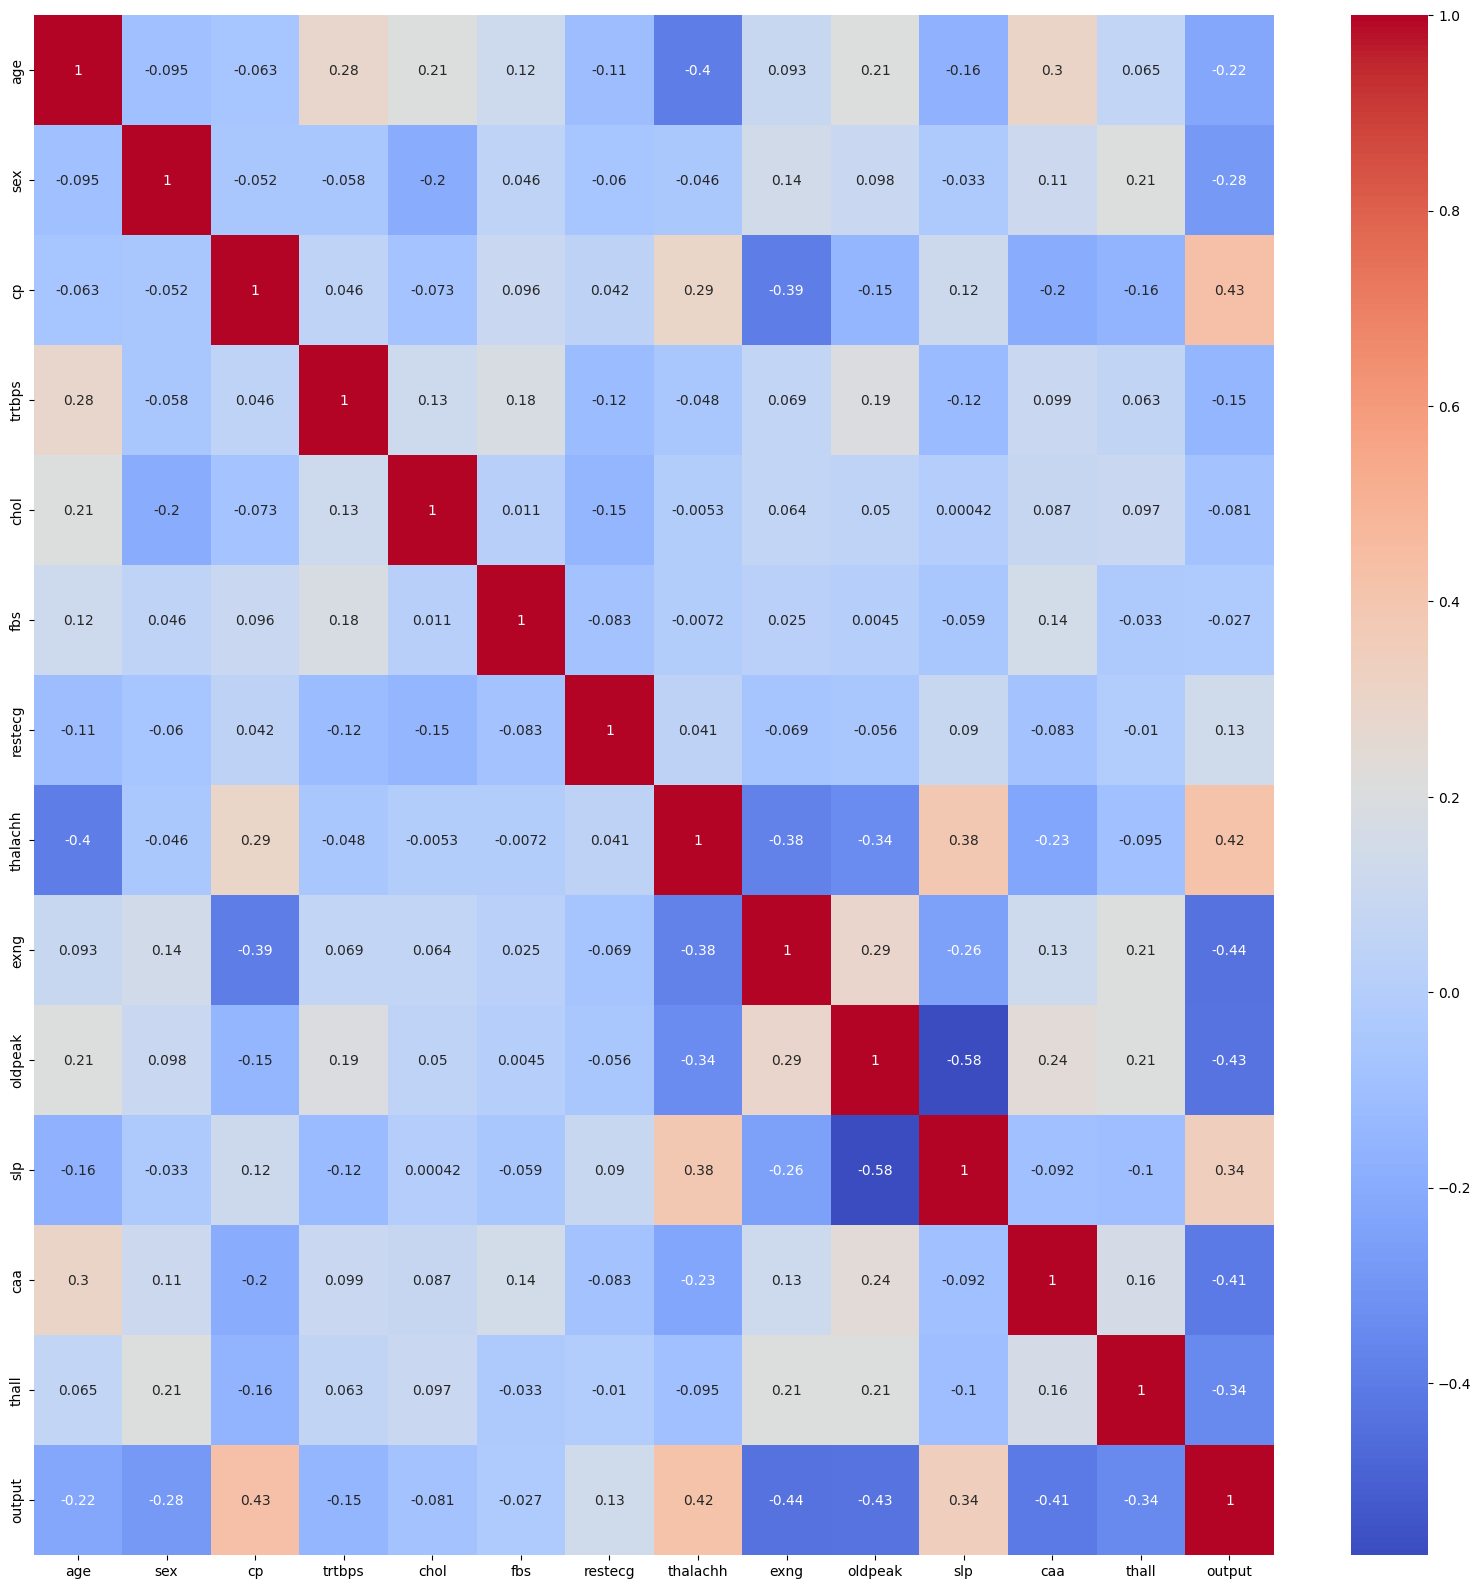

In [18]:
# Make a correlation heatmap
# Calculate the correlation matrix
corr_matrix = df.corr()

# Set the size of the heatmap
fig, ax = plt.subplots(figsize=(20, 20))

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.show()

In [19]:
# Further Data Analysis

# Checking the number of rows and columns
print(df.shape)



(302, 14)


In [20]:
# Getting summary statistics
print(df.describe())

             age         sex          cp      trtbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815    1.043046    1.397351    0.718543   
std      0.526027   22.903527    0.4

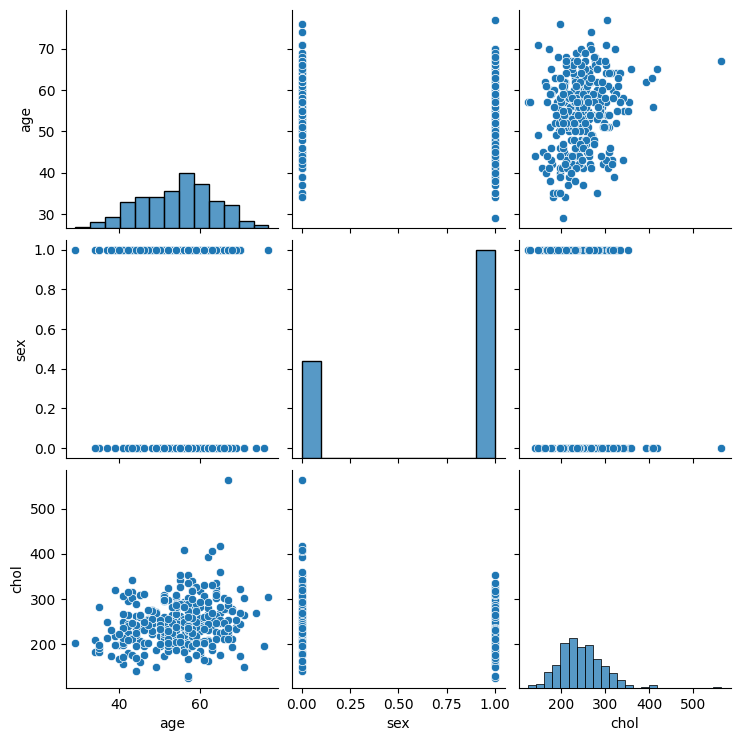

In [21]:
# Some EDA's
sns.pairplot(df[['age', 'sex', 'chol']])

In [22]:
# Explore the relationship between each dependent variable with each independent variable. 
# (e.g using  a bar plot with overlay) Below is the relationship between sex and output. 0 is female, and 1 is male.

In [23]:
# Below is the relationship between sex and output.
# create contingency table of  values in the predictor and target variables
crosstab_01 = pd.crosstab(df['sex'], df['output'])
crosstab_01

output,0,1
sex,,
0,24,72
1,114,92


<AxesSubplot:xlabel='sex'>

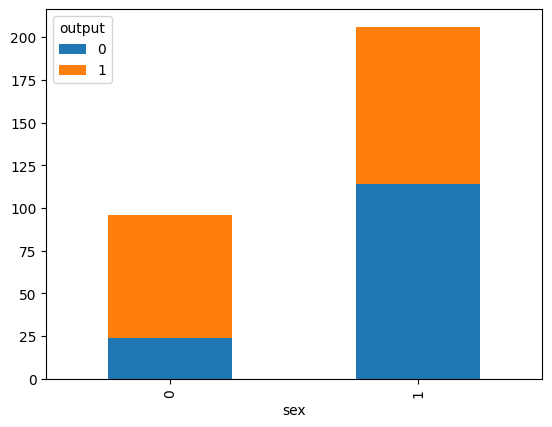

In [24]:
# create bar graph based on table
crosstab_01.plot(kind='bar', stacked = True)

##### Below are the normalized bar graphs with output overlay for sex and output.

<AxesSubplot:xlabel='sex'>

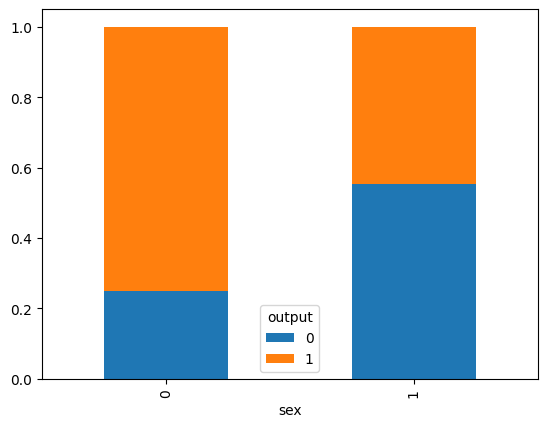

In [25]:
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
crosstab_norm.plot(kind='bar', stacked = True)

##### Below is the relationship between chest pain type and output.

<AxesSubplot:xlabel='cp'>

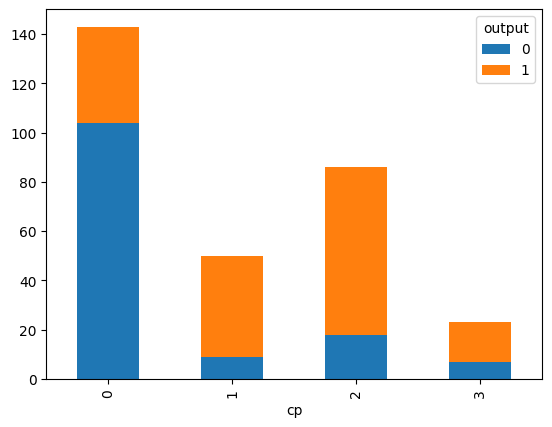

In [26]:
# create contingency table of  values in the predictor and target variables
crosstab_02 = pd.crosstab(df['cp'], df['output'])

# create bar graph based on table
crosstab_02.plot(kind='bar', stacked = True)

##### Below are the normalized bar graphs with output overlay for chest pain type and output.

<AxesSubplot:xlabel='cp'>

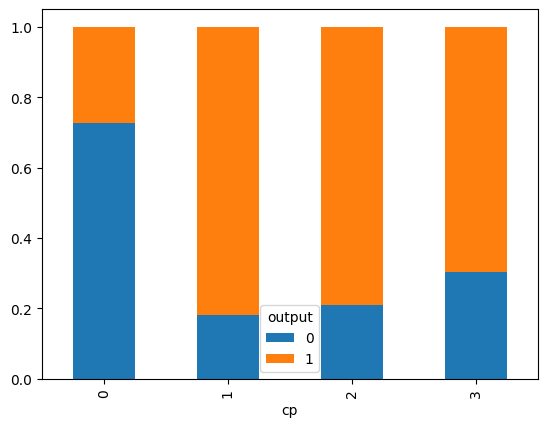

In [27]:
crosstab_norm2 = crosstab_02.div(crosstab_02.sum(1), axis = 0)
crosstab_norm2.plot(kind='bar', stacked = True)

##### According to the visualization above, those with chest pain type 0 are least likely to have a heart attack.





##### Below is the relationship between exercise-induced angina and output.

<AxesSubplot:xlabel='exng'>

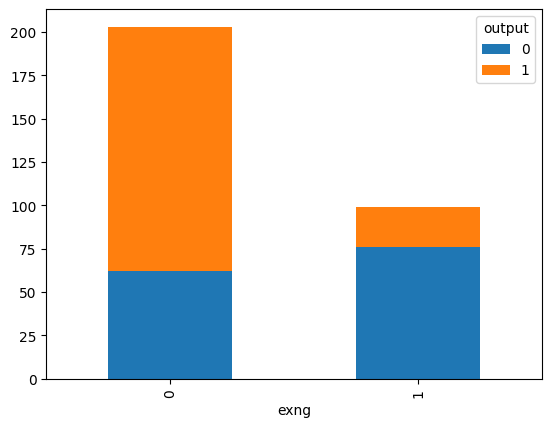

In [28]:
# create contingency table of  values in the predictor and target variables
crosstab_03 = pd.crosstab(df['exng'], df['output'])

# create bar graph based on table
crosstab_03.plot(kind='bar', stacked = True)

##### Below are the normalized bar graphs with output overlay for exercise-induced angina.

<AxesSubplot:xlabel='exng'>

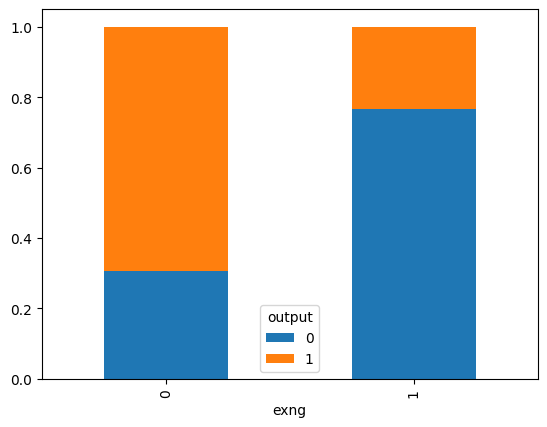

In [29]:
crosstab_norm3 = crosstab_03.div(crosstab_03.sum(1), axis = 0)
crosstab_norm3.plot(kind='bar', stacked = True)

##### According to the visualization above, those who have experienced exercise-induced angina are less likely to have a chance of a heart attack.


## Baseline Model

In [30]:
# Create variables

X = df[['cp','thalachh', 'exng']]
y = df['output']

# Partition data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 7)

# Create dummy classifier

baseline = DummyClassifier(strategy = 'uniform', random_state = 7)
baseline.fit(X_train, y_train.values.ravel())

DummyClassifier(random_state=7, strategy='uniform')

In [31]:
# Check model accuracy

y_pred = baseline.predict(X_test)

# Create confusion matrix

ypred = pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames = ['Predicted'])
ypred['Total'] = ypred.sum(axis = 1)
ypred.loc['Total'] = ypred.sum()
print(ypred)

Predicted   0   1  Total
Actual                  
0          18  26     44
1          24  23     47
Total      42  49     91


In [32]:
# Create confusion matrix variables

TP = ypred[1][1]
FP = ypred[1][0]
TN = ypred[0][0]
FN = ypred[0][1]
TAN = TN + FP
TAP = TP + FN
TPN = TN + FN
TPP = TP + FP
GT = ypred['Total']['Total']

In [33]:
# Calculate metrics

accuracy = round((TN+TP)/GT, 3)
error_rate = round ((1-accuracy), 3)
sensitivity = round((TP/TAP), 3)
specificity = round((TN/TAN), 3)
precision = round((TP/TPP), 3)
F1 = round(2*((precision*specificity)/(precision+specificity)), 3)
F2 = round(5*((precision*specificity)/((4*precision)+specificity)), 3)
F05 = round(1.25*((precision*specificity)/((.25*precision)+specificity)), 3)

In [34]:
# Create metrics table

data = [['Accuracy','(TN+TP)/GT', accuracy], ['Error Rate', '1-Accuracy', error_rate], 
    ['Sensitivity','(TP/TAP)', sensitivity], ['Specificity', 'TN/TAN', specificity], 
    ['Precision', 'TP/TPP', precision], ['F1', '2*(precision*specificity)/(precision+specificity)', F1],
    ['F2', '5*(precision*specificity)/((4*precision)+specificity)', F2],
    ['F0.5', '1.25*(precision*specificity)/((.25*precision)+specificity)', F05]]
columns = ['Evaluation Metric', 'Formula', 'Value']
print(tabulate(data, headers = columns, tablefmt = "fancy_grid"))

╒═════════════════════╤════════════════════════════════════════════════════════════╤═════════╕
│ Evaluation Metric   │ Formula                                                    │   Value │
╞═════════════════════╪════════════════════════════════════════════════════════════╪═════════╡
│ Accuracy            │ (TN+TP)/GT                                                 │   0.451 │
├─────────────────────┼────────────────────────────────────────────────────────────┼─────────┤
│ Error Rate          │ 1-Accuracy                                                 │   0.549 │
├─────────────────────┼────────────────────────────────────────────────────────────┼─────────┤
│ Sensitivity         │ (TP/TAP)                                                   │   0.489 │
├─────────────────────┼────────────────────────────────────────────────────────────┼─────────┤
│ Specificity         │ TN/TAN                                                     │   0.409 │
├─────────────────────┼───────────────────────────

## Logistic Regression Model

In [35]:
# Create variables

X1 = df[['cp','thalachh', 'exng']]
X1 = sm.add_constant(X1)
y1 = df['output']

# Partition data

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.30, random_state = 7)

# Create logistic regression model

LogReg = LogisticRegression().fit(X1_train, y1_train.values.ravel())

In [36]:
# Create confusion matrix

y1_pred = LogReg.predict(X1_test)
y1pred = pd.crosstab(y1_test, y1_pred, rownames = ['Actual'], colnames = ['Predicted'])
y1pred['Total'] = y1pred.sum(axis = 1)
y1pred.loc['Total'] = y1pred.sum()
print(y1pred)

Predicted   0   1  Total
Actual                  
0          31  13     44
1           4  43     47
Total      35  56     91


In [37]:
# Create confusion matrix variables

TP1 = y1pred[1][1]
FP1 = y1pred[1][0]
TN1 = y1pred[0][0]
FN1 = y1pred[0][1]
TAN1 = TN1 + FP1
TAP1 = TP1 + FN1
TPN1 = TN1 + FN1
TPP1 = TP1 + FP1
GT1 = y1pred['Total']['Total']

In [38]:
# Calculate metrics

accuracy1 = round((TN1+TP1)/GT1, 3)
error_rate1 = round ((1-accuracy1), 3)
sensitivity1 = round((TP1/TAP1), 3)
specificity1 = round((TN1/TAN1), 3)
precision1 = round((TP1/TPP1), 3)
F11 = round(2*((precision1*specificity1)/(precision1+specificity1)), 3)
F21 = round(5*((precision1*specificity1)/((4*precision1)+specificity1)), 3)
F051 = round(1.25*((precision1*specificity1)/((.25*precision1)+specificity1)), 3)

In [39]:
# Create metrics table

data1 = [['Accuracy', '(TN+TP)/GT', accuracy1], ['Error Rate', '1-Accuracy', error_rate1], 
    ['Sensitivity', 'TP/TAP', sensitivity1], ['Specificity', 'TN/TAN', specificity1], 
    ['Precision', 'TP/TPP', precision1], ['F1', '2*(Precision*Specificity)/(Precision+Specificity)', F11],
    ['F2', '5*(Precision*Specificity)/((4*Precision)+Specificity)', F21],
    ['F0.5', '1.25*(Precision*Specificity)/((0.25*Precision)+Specificity)', F051]]
columns = ['Evaluation Metric', 'Formula', 'Value'] 
print(tabulate(data1, headers=columns, tablefmt='fancy_grid'))

╒═════════════════════╤═════════════════════════════════════════════════════════════╤═════════╕
│ Evaluation Metric   │ Formula                                                     │   Value │
╞═════════════════════╪═════════════════════════════════════════════════════════════╪═════════╡
│ Accuracy            │ (TN+TP)/GT                                                  │   0.813 │
├─────────────────────┼─────────────────────────────────────────────────────────────┼─────────┤
│ Error Rate          │ 1-Accuracy                                                  │   0.187 │
├─────────────────────┼─────────────────────────────────────────────────────────────┼─────────┤
│ Sensitivity         │ TP/TAP                                                      │   0.915 │
├─────────────────────┼─────────────────────────────────────────────────────────────┼─────────┤
│ Specificity         │ TN/TAN                                                      │   0.705 │
├─────────────────────┼─────────────────

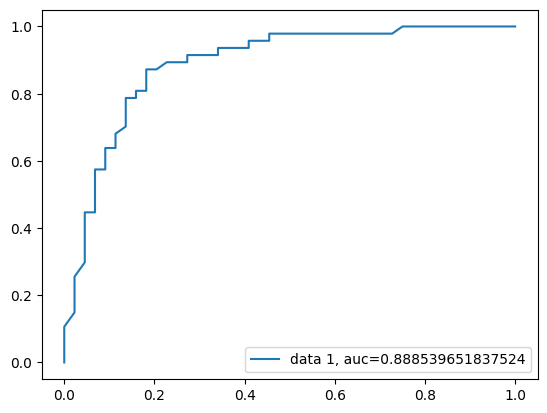

In [40]:
# Create a visualization of the Logistic Regression model

y1_pred_prob = LogReg.predict_proba(X1_test)[::, 1]
fpr, tpr, _ =metrics.roc_curve(y1_test, y1_pred_prob)
auc = metrics.roc_auc_score(y1_test, y1_pred_prob)
plt.plot(fpr, tpr, label = 'data 1, auc='+str(auc))
plt.legend(loc = 4)
plt.show()

## Naive Bayes

In [41]:
# Create variables
X2 = df[['cp', 'thalachh', 'exng']]
X2 = sm.add_constant(X2)
y2 = df['output']

# Partition data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30, random_state=7) 

# Create Multinomial Naive Bayes model
NB = MultinomialNB().fit(X2_train, y2_train)

# Create confusion matrix
y2_pred = NB.predict(X2_test)
y2_pred = pd.crosstab(y2_test, y2_pred, rownames=['Actual'], colnames=['Predicted'])
y2_pred['Total'] = y2_pred.sum(axis=1)
y2_pred.loc['Total'] = y2_pred.sum()
print(y2_pred)

Predicted   0   1  Total
Actual                  
0          36   8     44
1          11  36     47
Total      47  44     91


In [42]:
# Create confusion matrix variables
TP2 = y2_pred[1][1]
FP2 = y2_pred[1][0]
TN2 = y2_pred[0][0]
FN2 = y2_pred[0][1]
TAN2 = TN2 + FP2
TAP2 = TP2 + FN2
TPN2 = TN2 + FN2
TPP2 = TP2 + FP2
GT2 = y2_pred['Total']['Total']

In [43]:
# Calculate metrics
accuracy2 = round((TN2 + TP2) / GT2, 3)
error_rate2 = round((1 - accuracy2), 3)
sensitivity2 = round((TP2 / TAP2), 3)
specificity2 = round((TN2 / TAN2), 3)
precision2 = round((TP2 / TPP2), 3)
F12 = round(2 * ((precision2 * specificity2) / (precision2 + specificity2)), 3)
F22 = round(5 * ((precision2 * specificity2) / ((4 * precision2) + specificity2)), 3)
F052 = round(1.25 * ((precision2 * specificity2) / ((0.25 * precision2) + specificity2)), 3)

In [44]:
# Create metrics table
data2 = [['Accuracy', '(TN+TP)/GT', accuracy2], ['Error Rate', '1-Accuracy', error_rate2],
         ['Sensitivity', 'TP/TAP', sensitivity2], ['Specificity', 'TN/TAN', specificity2],
         ['Precision', 'TP/TPP', precision2],
         ['F1', '2*(Precision*Specificity)/(Precision+Specificity)', F12],
         ['F2', '5*(Precision*Specificity)/((4*Precision)+Specificity)', F22],
         ['F0.5', '1.25*(Precision*Specificity)/((0.25*Precision)+Specificity)', F052]]
columns = ['Evaluation Metric', 'Formula', 'Value']
print(tabulate(data2, headers=columns, tablefmt='fancy_grid'))

╒═════════════════════╤═════════════════════════════════════════════════════════════╤═════════╕
│ Evaluation Metric   │ Formula                                                     │   Value │
╞═════════════════════╪═════════════════════════════════════════════════════════════╪═════════╡
│ Accuracy            │ (TN+TP)/GT                                                  │   0.791 │
├─────────────────────┼─────────────────────────────────────────────────────────────┼─────────┤
│ Error Rate          │ 1-Accuracy                                                  │   0.209 │
├─────────────────────┼─────────────────────────────────────────────────────────────┼─────────┤
│ Sensitivity         │ TP/TAP                                                      │   0.766 │
├─────────────────────┼─────────────────────────────────────────────────────────────┼─────────┤
│ Specificity         │ TN/TAN                                                      │   0.818 │
├─────────────────────┼─────────────────

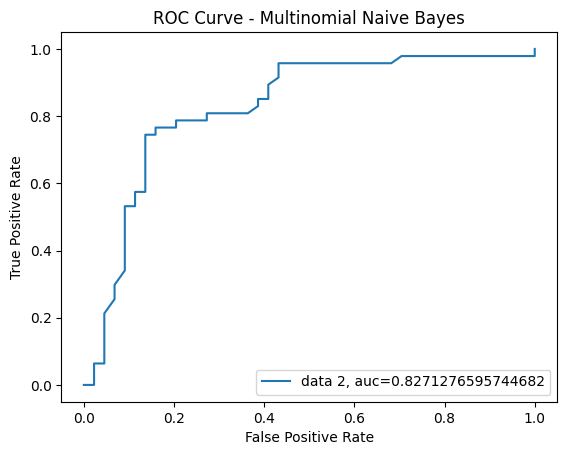

In [45]:
# Create a visualization of the Multinomial Naive Bayes model
y2_pred_prob = NB.predict_proba(X2_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y2_test, y2_pred_prob)
auc = metrics.roc_auc_score(y2_test, y2_pred_prob)
plt.plot(fpr, tpr, label='data 2, auc=' + str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multinomial Naive Bayes')
plt.show()


## CART (Classification and Regression Trees) model:

In [46]:
# Create variables
X3 = df[['cp', 'thalachh', 'exng']] 
X3 = sm.add_constant(X3)
y3 = df['output'] 

# Partition data
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.30, random_state=7)

# Create Decision Tree Classifier model
clf = DecisionTreeClassifier(random_state=7)
clf.fit(X3_train, y3_train)


DecisionTreeClassifier(random_state=7)

In [47]:
# Create confusion matrix
y3_pred = clf.predict(X3_test)
y3_pred = pd.crosstab(y3_test, y3_pred, rownames=['Actual'], colnames=['Predicted'])
y3_pred['Total'] = y3_pred.sum(axis=1)
y3_pred.loc['Total'] = y3_pred.sum()
print(y3_pred)

Predicted   0   1  Total
Actual                  
0          31  13     44
1          12  35     47
Total      43  48     91


In [48]:
# Create confusion matrix variables
TP3 = y3_pred[1][1]
FP3 = y3_pred[1][0]
TN3 = y3_pred[0][0]
FN3 = y3_pred[0][1]
TAN3 = TN3 + FP3
TAP3 = TP3 + FN3
TPN3 = TN3 + FN3
TPP3 = TP3 + FP3
GT3 = y3_pred['Total']['Total']

In [49]:
# Calculate metrics
accuracy3 = round((TN3 + TP3) / GT3, 3)
error_rate3 = round((1 - accuracy3), 3)
sensitivity3 = round((TP3 / TAP3), 3)
specificity3 = round((TN3 / TAN3), 3)
precision3 = round((TP3 / TPP3), 3)
F13 = round(2 * ((precision3 * specificity3) / (precision3 + specificity3)), 3)
F23 = round(5 * ((precision3 * specificity3) / ((4 * precision3) + specificity3)), 3)
F053 = round(1.25 * ((precision3 * specificity3) / ((0.25 * precision3) + specificity3)), 3)

In [50]:
# Create metrics table
data3 = [['Accuracy', '(TN+TP)/GT', accuracy3], ['Error Rate', '1-Accuracy', error_rate3],
         ['Sensitivity', 'TP/TAP', sensitivity3], ['Specificity', 'TN/TAN', specificity3],
         ['Precision', 'TP/TPP', precision3],
         ['F1', '2*(Precision*Specificity)/(Precision+Specificity)', F13],
         ['F2', '5*(Precision*Specificity)/((4*Precision)+Specificity)', F23],
         ['F0.5', '1.25*(Precision*Specificity)/((0.25*Precision)+Specificity)', F053]]
columns = ['Evaluation Metric', 'Formula', 'Value']
print(tabulate(data3, headers=columns, tablefmt='fancy_grid'))

╒═════════════════════╤═════════════════════════════════════════════════════════════╤═════════╕
│ Evaluation Metric   │ Formula                                                     │   Value │
╞═════════════════════╪═════════════════════════════════════════════════════════════╪═════════╡
│ Accuracy            │ (TN+TP)/GT                                                  │   0.725 │
├─────────────────────┼─────────────────────────────────────────────────────────────┼─────────┤
│ Error Rate          │ 1-Accuracy                                                  │   0.275 │
├─────────────────────┼─────────────────────────────────────────────────────────────┼─────────┤
│ Sensitivity         │ TP/TAP                                                      │   0.745 │
├─────────────────────┼─────────────────────────────────────────────────────────────┼─────────┤
│ Specificity         │ TN/TAN                                                      │   0.705 │
├─────────────────────┼─────────────────

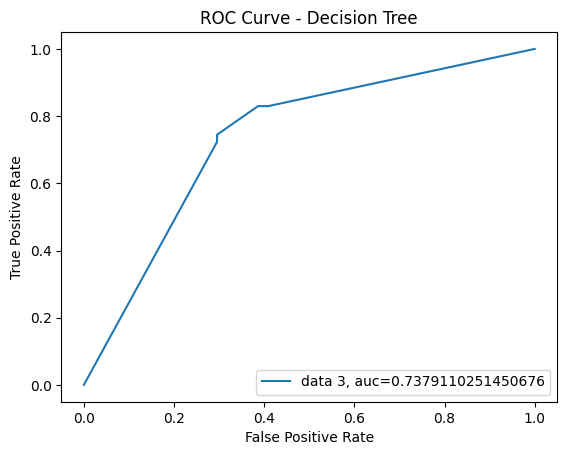

In [51]:
# Create a visualization of the Decision Tree model
y3_pred_prob = clf.predict_proba(X3_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y3_test, y3_pred_prob)
auc = metrics.roc_auc_score(y3_test, y3_pred_prob)
plt.plot(fpr, tpr, label='data 3, auc=' + str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.show()


## C5.0 Decision Tree

In [52]:
# Using variables from previous cells
# X3 (cp, thalachh, exng), y3 (output)
# X3_train, X3_test, y3_train, y3_test


In [79]:
# Create C5.0 Decision Tree model
dtree = DecisionTreeClassifier(criterion='entropy', random_state=7, max_leaf_nodes=5).fit(X3_train, y3_train)


In [54]:


# Create C5.0 Decision Tree model
c50_01 = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5).fit(X3_train, y3_train)

# Create confusion matrix
y_pred5 = c50_01.predict(X3_test)
y_pred5 = pd.crosstab(y3_test, y_pred5, rownames=['Actual'], colnames=['Predicted'])
y_pred5['Total'] = y_pred5.sum(axis=1)
y_pred5.loc['Total'] = y_pred5.sum()
print(y_pred5)



Predicted   0   1  Total
Actual                  
0          25  19     44
1           2  45     47
Total      27  64     91


In [55]:

# Create confusion matrix variables
TP5 = y_pred5[1][1]
FP5 = y_pred5[1][0]
TN5 = y_pred5[0][0]
FN5 = y_pred5[0][1]
TAN5 = TN5 + FP5
TAP5 = TP5 + FN5
TPN5 = TN5 + FN5
TPP5 = TP5 + FP5
GT5 = y_pred5['Total']['Total']



In [80]:
# Calculate metrics
accuracy4 = round((TN5 + TP5) / GT5, 3)
error_rate4 = round((1 - accuracy5), 3)
sensitivity4 = round((TP5 / TAP5), 3)
specificity4 = round((TN5 / TAN5), 3)
precision4 = round((TP5 / TPP5), 3)
F14 = round(2 * ((precision4 * specificity4) / (precision4 + specificity4)), 3)
F24 = round(5 * ((precision4 * specificity4) / ((4 * precision4) + specificity4)), 3)
F054 = round(1.25 * ((precision4 * specificity4) / ((0.25 * precision4) + specificity4)), 3)



In [81]:
# Create metrics table
data4 = [['Accuracy', '(TN+TP)/GT', accuracy4], ['Error Rate', '1-Accuracy', error_rate4],
         ['Sensitivity', 'TP/TAP', sensitivity4], ['Specificity', 'TN/TAN', specificity4],
         ['Precision', 'TP/TPP', precision4],
         ['F1', '2*(Precision*Specificity)/(Precision+Specificity)', F15],
         ['F2', '5*(Precision*Specificity)/((4*Precision)+Specificity)', F25],
         ['F0.5', '1.25*(Precision*Specificity)/((0.25*Precision)+Specificity)', F054]]
columns = ['Evaluation Metric', 'Formula', 'Value']
print(tabulate(data4, headers=columns, tablefmt='fancy_grid'))



╒═════════════════════╤═════════════════════════════════════════════════════════════╤═════════╕
│ Evaluation Metric   │ Formula                                                     │   Value │
╞═════════════════════╪═════════════════════════════════════════════════════════════╪═════════╡
│ Accuracy            │ (TN+TP)/GT                                                  │   0.725 │
├─────────────────────┼─────────────────────────────────────────────────────────────┼─────────┤
│ Error Rate          │ 1-Accuracy                                                  │   0.275 │
├─────────────────────┼─────────────────────────────────────────────────────────────┼─────────┤
│ Sensitivity         │ TP/TAP                                                      │   0.809 │
├─────────────────────┼─────────────────────────────────────────────────────────────┼─────────┤
│ Specificity         │ TN/TAN                                                      │   0.636 │
├─────────────────────┼─────────────────

Text(0, 0.5, 'True Positive Rate')

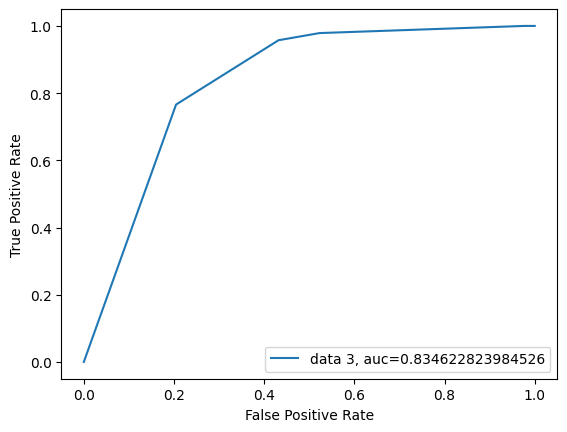

In [82]:
# Create a visualization of the C5.0 Decision Tree model
y_pred_prob5 = c50_01.predict_proba(X3_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y3_test, y_pred_prob5)
auc = metrics.roc_auc_score(y3_test, y_pred_prob5)
plt.plot(fpr, tpr, label='data 3, auc=' + str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


## Random Forest

In [59]:
# create required 1D array
rfy = np.ravel(y3_train)

# create random forest
rf01 = RandomForestClassifier(n_estimators = 100, criterion="gini").fit(X3_train,rfy)


In [60]:
# Create confusion matrix
y5_pred = rf01.predict(X3_test)
y5_pred = pd.crosstab(y3_test, y5_pred, rownames=['Actual'], colnames=['Predicted'])
y5_pred['Total'] = y5_pred.sum(axis=1)
y5_pred.loc['Total'] = y5_pred.sum()
print(y5_pred)

Predicted   0   1  Total
Actual                  
0          28  16     44
1           9  38     47
Total      37  54     91


In [61]:
# Create confusion matrix variables
TP5 = y5_pred[1][1]
FP5 = y5_pred[1][0]
TN5 = y5_pred[0][0]
FN5 = y5_pred[0][1]
TAN5 = TN5 + FP5
TAP5 = TP5 + FN5
TPN5 = TN5 + FN5
TPP5 = TP5 + FP5
GT5 = y5_pred['Total']['Total']



In [83]:
# Calculate metrics
accuracy5 = round((TN5 + TP5) / GT5, 3)
error_rate5 = round((1 - accuracy5), 3)
sensitivity5 = round((TP5 / TAP5), 3)
specificity5 = round((TN5 / TAN5), 3)
precision5 = round((TP5 / TPP5), 3)
F15 = round(2 * ((precision5 * specificity5) / (precision5 + specificity5)), 3)
F25 = round(5 * ((precision5 * specificity5) / ((4 * precision5) + specificity5)), 3)
F055 = round(1.25 * ((precision5 * specificity5) / ((0.25 * precision5) + specificity5)), 3)



In [63]:
# Create metrics table
data5 = [['Accuracy', '(TN+TP)/GT', accuracy5], ['Error Rate', '1-Accuracy', error_rate5],
         ['Sensitivity', 'TP/TAP', sensitivity5], ['Specificity', 'TN/TAN', specificity5],
         ['Precision', 'TP/TPP', precision5],
         ['F1', '2*(Precision*Specificity)/(Precision+Specificity)', F15],
         ['F2', '5*(Precision*Specificity)/((4*Precision)+Specificity)', F25],
         ['F0.5', '1.25*(Precision*Specificity)/((0.25*Precision)+Specificity)', F055]]
columns = ['Evaluation Metric', 'Formula', 'Value']

print(tabulate(data5, headers=columns, tablefmt='fancy_grid'))


╒═════════════════════╤═════════════════════════════════════════════════════════════╤═════════╕
│ Evaluation Metric   │ Formula                                                     │   Value │
╞═════════════════════╪═════════════════════════════════════════════════════════════╪═════════╡
│ Accuracy            │ (TN+TP)/GT                                                  │   0.725 │
├─────────────────────┼─────────────────────────────────────────────────────────────┼─────────┤
│ Error Rate          │ 1-Accuracy                                                  │   0.275 │
├─────────────────────┼─────────────────────────────────────────────────────────────┼─────────┤
│ Sensitivity         │ TP/TAP                                                      │   0.809 │
├─────────────────────┼─────────────────────────────────────────────────────────────┼─────────┤
│ Specificity         │ TN/TAN                                                      │   0.636 │
├─────────────────────┼─────────────────

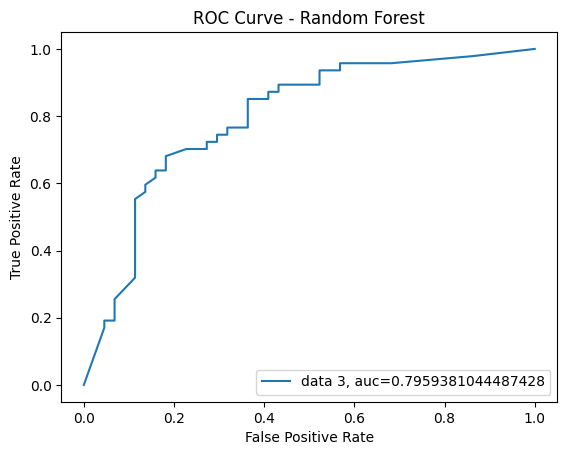

In [64]:
# Visualization of the Random Forest
y5_pred_prob = rf01.predict_proba(X3_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y3_test, y5_pred_prob)
auc = metrics.roc_auc_score(y3_test, y5_pred_prob)
plt.plot(fpr, tpr, label='data 3, auc=' + str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.show()

In [85]:
# Create evaluation metric table to compare all models

totaldata = [['Accuracy', accuracy, accuracy1, accuracy2, accuracy3, accuracy4, accuracy5], 
    ['Error Rate', error_rate, error_rate1, error_rate2, error_rate3, error_rate4, error_rate5], 
    ['Sensitivity', sensitivity, sensitivity1, sensitivity2, sensitivity3, sensitivity4, sensitivity5], 
    ['Specificity', specificity, specificity1, specificity2, specificity3, specificity4, specificity5], 
    ['Precision', precision, precision1, precision2, precision3, precision4, precision5], 
    ['F1', F1, F11, F12, F13, F14, F15],
    ['F2', F2, F21, F22, F23, F24, F25],
    ['F0.5', F05, F051, F052, F053, F054, F055]]
columns = ['Evaluation Metric', 'Baseline', 'Logistic Regression', 'Naive Bayes', 'CART', 'C5.0', 'Random Forest']
print(tabulate(totaldata, headers = columns, tablefmt = "fancy_grid"))


╒═════════════════════╤════════════╤═══════════════════════╤═══════════════╤════════╤════════╤═════════════════╕
│ Evaluation Metric   │   Baseline │   Logistic Regression │   Naive Bayes │   CART │   C5.0 │   Random Forest │
╞═════════════════════╪════════════╪═══════════════════════╪═══════════════╪════════╪════════╪═════════════════╡
│ Accuracy            │      0.451 │                 0.813 │         0.791 │  0.725 │  0.725 │           0.725 │
├─────────────────────┼────────────┼───────────────────────┼───────────────┼────────┼────────┼─────────────────┤
│ Error Rate          │      0.549 │                 0.187 │         0.209 │  0.275 │  0.275 │           0.275 │
├─────────────────────┼────────────┼───────────────────────┼───────────────┼────────┼────────┼─────────────────┤
│ Sensitivity         │      0.489 │                 0.915 │         0.766 │  0.745 │  0.809 │           0.809 │
├─────────────────────┼────────────┼───────────────────────┼───────────────┼────────┼────────┼──

## Results
Each model created in this project was cross-validated using a 70/30 train/test split from the data set. To determine which of the five types of models is best suited for the project's objective, a complete model evaluation was done on each one, as shown in Table above. 

The evaluation metrics measured the accuracy, error rate, sensitivity, specificity, precision, F1 value, F2 value, and F0.5 value. All of the models created had a higher accuracy than the baseline model, which suggests that each model is robust. The logistic regression had the highest accuracy at 0.813 and the lowest error rate at 0.187. This indicates that the logistic regression model had the highest proportion of correct classifications and the lowest rate of misclassifications. The naïve Bayes model had the highest precision of 0.818, representing the highest proportion of the predicted to actual positive cases, and the highest specificity of 0.818, the highest proportion of the predicted negative to actual negative cases. The C5.0 model has the highest sensitivity, which suggests that this model will be good if false negatives are more costly to the objective, as this value describes the number of positive cases classified correctly and will decrease as the false negative cases increase. The naïve Bayes model has the highest F1, F2, and F0.5 values, which indicates that this model will be robust in weighing the positive predicted values and the relevant cases.
	Given this project's scope, it is imperative to prioritize the accuracy value when selecting the most suitable model. The ability of the chosen model to accurately predict outcomes, represented as either 0 or 1, is crucial in identifying patients with a high risk of experiencing a heart attack. This is particularly important in the medical field, where timely and accurate diagnoses can help mitigate adverse health events. After careful evaluation, the logistic regression model emerged as the best fit for this objective, with its superior accuracy and low error rate. By employing the logistic regression model, medical professionals can be more confident in their diagnoses, and patients can receive timely and appropriate care.



## Conclusion
In conclusion, this project paper offers valuable insights into developing and evaluating a machine-learning model for forecasting a patient's risk of heart attack based on medical data. The research shows that machine learning can adequately forecast cardiovascular disease based on specific parameters such as chest pain type, maximum heart rate reached, and exercise-induced angina.
The regression model constructed in this study had an accuracy of 0.813 and performed well across various evaluation measures, including sensitivity, specificity, precision, and F1, F2, and F0.5 scores. That suggests that the approach could be used in clinical practice to identify high-risk patients who require more monitoring or intervention, ultimately improving patient outcomes and lowering healthcare expenditures.
The project emphasizes the significance of early detection of heart attack risk, which can aid in the prevention or reduction of heart attacks through lifestyle modifications, medication, or surgical treatments. The model created in this study can also aid in developing more effective preventative and treatment approaches by identifying the underlying causes and risk factors of heart disease.
The study evaluated the performance of six distinct algorithms, and results indicated that the Multinomial Naive Bayes model demonstrated potential for predicting cardiac disease. In contrast, the CART and C5.0 models performed favorably. Although the Random Forest method was also implemented, it exhibited inferior performance compared to the other models.
Overall, the study offers a significant development in machine learning for heart disease prediction and lays the groundwork for future research in this area. One needs to be familiar with the study's primary keywords, which include CART, C5.0, data mining, heart attacks, logistic regression, machine learning, Naive Bayes, and random forest, to completely comprehend the methodologies used and the significance of the results obtained.
In summary, the study's developed model has the potential to be applied in clinical practice, aiding in the prevention and treatment of heart disease, one of the world's major causes of mortality.
